In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d'
run_name = 'eval_fix'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate the 3d kite at fixed attack angle for different angles

In [69]:
params = dict()

# ENVIRONMENT PARAMETERS
env_params = dict()
env_params['int_steps'] = 0.0005 # sec
env_params['ep_length'] = 3 # sec
env_params['decision_time'] = 0.01 # sec
env_params['init_theta'] = np.pi/2 # rad
env_params['init_dtheta'] = 0 # rad
env_params['init_phi'] = 0 # rad
env_params['init_dphi'] = 0 # rad
# attack angles
env_params['alphas'] = [-4, 0, 4, 8, 12, 14, 16, 18, 20]
env_params['CL_alphas'] = [0.05, 0.35, 0.55, 0.75, 0.9, 1.0, 1.08, 1.1, 1.05]
env_params['CD_alphas'] = [0.001, 0.01, 0.03, 0.07, 0.1, 0.13, 0.18, 0.18, 0.21]
env_params['init_alpha'] = len(env_params['alphas'])-1
# bank angles
env_params['banks'] = np.deg2rad([-8,-6,-4,-2,-1,0,1,2,4,6,8])
env_params['init_bank'] = int(len(env_params['banks'])/2) # index
# wind
env_params['wind_type'] = 'const'
env_params['v_wind_x'] = 10 # m/sec
env_params['v_wind_y'] = 0 # m/sec
env_params['v_wind_z'] = 0 # m/sec

# EVALUATION PARAMETERS
params['alg_type'] = 'eval'
params['ev_time'] = env_params['ep_length'] # sec
params['n_steps'] = params['ev_time']/env_params['decision_time']+1
params['traj_points'] = params['n_steps']
params['policy_path'] = data_dir+'/best_policy.txt'
params['gamma'] = 1

In [70]:
# WRITING THE PARAMETERS
ut.write_params(params, data_dir, 'param_alg.txt')
ut.write_params(env_params, data_dir, 'param_env.txt')

In [71]:
def write_policy(alpha, bank):
    file = open(data_dir + "/best_policy.txt", "w")
    for a in range(len(env_params['alphas'])):
        for b in range(len(env_params['banks'])):
            if a > alpha and b > bank:
                file.write("1 0 0 0 0 0 0 0\n")
            elif a > alpha and b == bank:
                file.write("0 1 0 0 0 0 0 0\n")
            elif a > alpha and b < bank:
                file.write("0 0 1 0 0 0 0 0\n")
            elif a == alpha and b > bank:
                file.write("0 0 0 1 0 0 0 0\n")
            elif a == alpha and b == bank:
                file.write("0 0 0 0 1 0 0 0\n")
            elif a == alpha and b < bank:
                file.write("0 0 0 0 0 1 0 0\n")
            elif a < alpha and b > bank:
                file.write("0 0 0 0 0 0 1 0\n")
            elif a < alpha and b == bank:
                file.write("0 0 0 0 0 0 0 1\n")
            else:
                file.write("0 0 0 0 0 0 0 0\n")
    file.close()

In [72]:
def execute():
    p = subprocess.Popen(["./run.exe", system_name, run_name], \
                           stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [73]:
def comp_av_return():
    traj, labels = ut.read_traj(data_dir + "return_traj.txt")
    return traj[:,0].mean()

In [74]:
traj_x, traj_y, traj_z = [], [], []
alphas, banks = [], []

In [75]:
alpha, bank = len(env_params['alphas'])-1, int(len(env_params['banks'])/2)-1
write_policy(alpha, bank)
alphas.append(alpha)
banks.append(bank)

In [76]:
execute()
comp_av_return()

17.773

In [77]:
st_traj, st_labels = ut.read_traj(data_dir + "/ev_states.txt")
xs = np.linspace(0, params['ev_time'], num=len(st_traj[:,0]))
traj_x.append(st_traj[:,0])
traj_y.append(st_traj[:,1])
traj_z.append(st_traj[:,2])

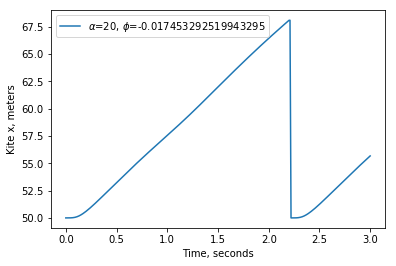

In [83]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite x, meters')
for i in range(len(traj_x)):
    plt.plot(xs, traj_x[i], label=r'$\alpha$='+str(env_params['alphas'][alphas[i]])+\
             ", $\phi$="+str(env_params['banks'][banks[i]]))
plt.legend()
#plt.savefig(plot_dir + "/kite_x_traj_banks.png", dpi=200)
plt.savefig(plot_dir + "/traj_mia_x.png", dpi=200)

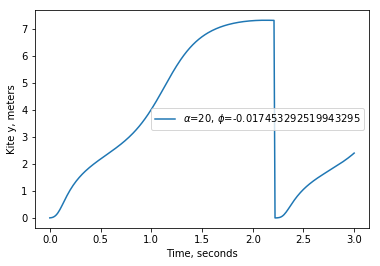

In [86]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite y, meters')
for i in range(len(traj_y)):
    plt.plot(xs, traj_y[i], label=r'$\alpha$='+str(env_params['alphas'][alphas[i]])+\
             ", $\phi$="+str(env_params['banks'][banks[i]]))
plt.legend()
#plt.savefig(plot_dir + "/kite_y_traj_banks.png", dpi=200)
plt.savefig(plot_dir + "/traj_mia_y.png", dpi=200)

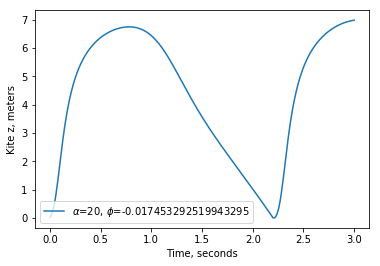

In [87]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite z, meters')
for i in range(len(traj_x)):
    plt.plot(xs, traj_z[i], label=r'$\alpha$='+str(env_params['alphas'][alphas[i]])+\
             ", $\phi$="+str(env_params['banks'][banks[i]]))
plt.legend()
#plt.savefig(plot_dir + "/kite_z_traj_banks.png", dpi=200)
plt.savefig(plot_dir + "/traj_mia_z.png", dpi=200)

In [11]:
f_nic = open('../data/kite3d/nicole_out.txt')
f_nic.readline()
t_nic, x_nic, y_nic, z_nic = [], [], []
traj_step=100
count = 1
for l in f_nic.readlines():
    if count % traj_step == 0:
        a = l.split(',')
        x_nic.append(float(a[1]))
        y_nic.append(float(a[2]))
        z_nic.append(float(a[3]))
    count+=1

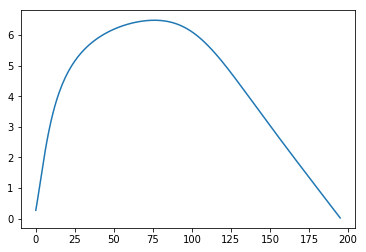

In [88]:
plt.plot(z_nic)
plt.savefig(plot_dir + "/traj_nic_z.png", dpi=200)

In [19]:
z_nic

[0.270171,
 0.574172,
 0.900671,
 1.237216,
 1.572413,
 1.897352,
 2.206045,
 2.495151,
 2.763349,
 3.010701,
 3.238102,
 3.446898,
 3.638622,
 3.814839,
 3.977053,
 4.126665,
 4.264945,
 4.39304,
 4.511969,
 4.622637,
 4.725844,
 4.822299,
 4.912629,
 4.997388,
 5.077068,
 5.152104,
 5.222884,
 5.289756,
 5.353027,
 5.412973,
 5.469843,
 5.52386,
 5.575224,
 5.624115,
 5.670698,
 5.715121,
 5.757517,
 5.798009,
 5.836708,
 5.873714,
 5.909119,
 5.943008,
 5.975456,
 6.006535,
 6.036307,
 6.064831,
 6.092162,
 6.118346,
 6.14343,
 6.167454,
 6.190455,
 6.212466,
 6.233518,
 6.253638,
 6.272852,
 6.29118,
 6.308643,
 6.325258,
 6.341038,
 6.355995,
 6.370141,
 6.383481,
 6.396021,
 6.407763,
 6.418708,
 6.428854,
 6.438195,
 6.446726,
 6.454435,
 6.461313,
 6.467343,
 6.47251,
 6.476793,
 6.480171,
 6.48262,
 6.484113,
 6.484623,
 6.484117,
 6.482564,
 6.479929,
 6.476175,
 6.471266,
 6.465163,
 6.457824,
 6.44921,
 6.43928,
 6.42799,
 6.415301,
 6.40117,
 6.385557,
 6.368423,
 6.349731